In [1]:
import os
import cv2
import numpy as np

# Define the directory containing the image data
data_dir = "personal_images/"

# Define the list of emotion labels
classes = ['angry', 'happy', 'neutral', 'sad']

# Initialize lists to store the images and corresponding labels
X = []
y = []

# Loop through each emotion class folder
for label, emotion in enumerate(classes):
    # Construct the path to the folder containing images for the current emotion
    emotion_dir = os.path.join(data_dir, emotion)
    
    # Loop through each image file in the emotion class folder
    for img_file in os.listdir(emotion_dir):
        # Read the image file
        img_path = os.path.join(emotion_dir, img_file)
        img = cv2.imread(img_path)
        
        # Preprocess the image (resize, normalize, etc.)
        img = cv2.resize(img, (224, 224))  # Resize the image to match your model's input size
        img = img / 255.0  # Normalize pixel values to the range [0, 1]
        
        # Append the preprocessed image and its label to the lists
        X.append(img)
        y.append(label)
    
# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Print the shapes of the input data and labels
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2661, 224, 224, 3)
y shape: (2661,)


In [2]:
import numpy as np

# Combine X and y into a single array
data = list(zip(X, y))

# Shuffle the data
np.random.shuffle(data)

# Unzip the shuffled data back into X and y
X_shuffled, y_shuffled = zip(*data)

# Convert back to numpy arrays
X = np.array(X_shuffled)
y = np.array(y_shuffled)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

2024-04-28 12:18:58.912750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model = load_model("IMGmodel_aug2.h5")

2024-04-28 12:20:46.257595: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X)
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = np.mean(y_pred_classes == y)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred_classes, target_names=classes))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_classes))


84/84 [==============================] - 138s 2s/step
Accuracy: 0.9958662157083803
Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.99      1.00       637
       happy       0.99      1.00      0.99       588
     neutral       0.99      1.00      1.00       608
         sad       1.00      0.99      1.00       828

    accuracy                           1.00      2661
   macro avg       1.00      1.00      1.00      2661
weighted avg       1.00      1.00      1.00      2661

Confusion Matrix:
[[633   0   4   0]
 [  0 587   1   0]
 [  1   0 607   0]
 [  0   5   0 823]]


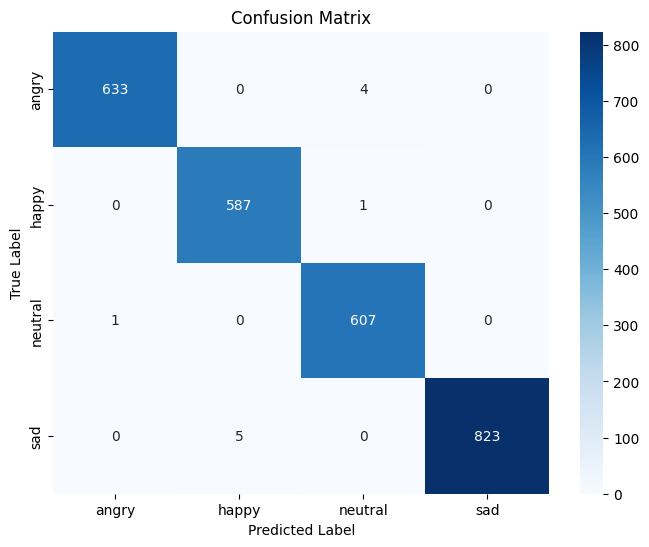

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.99      1.00       637
       happy       0.99      1.00      0.99       588
     neutral       0.99      1.00      1.00       608
         sad       1.00      0.99      1.00       828

    accuracy                           1.00      2661
   macro avg       1.00      1.00      1.00      2661
weighted avg       1.00      1.00      1.00      2661



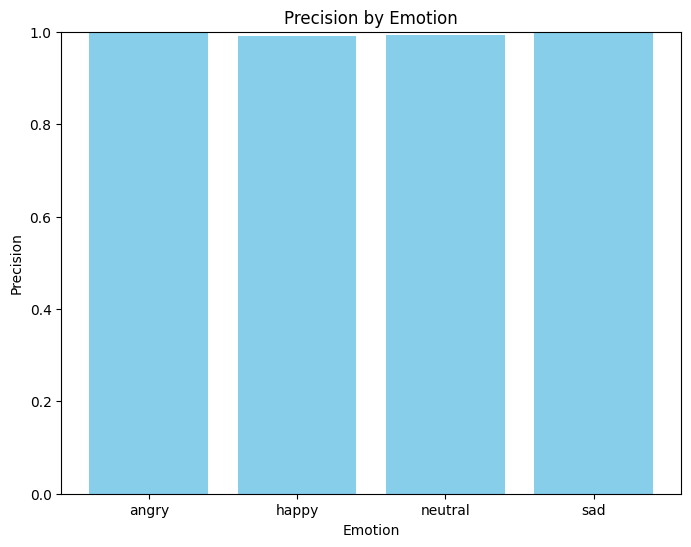

Overall Accuracy: 0.9958662157083803


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate confusion matrix
conf_mat = confusion_matrix(y, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred_classes, target_names=classes))

# Calculate accuracy by emotion
precision_scores = []
for emotion in range(len(classes)):
    precision_scores.append(conf_mat[emotion, emotion] / np.sum(conf_mat[:, emotion]))

# Plot accuracy by emotion
plt.figure(figsize=(8, 6))
plt.bar(classes, precision_scores, color='skyblue')
plt.title('Precision by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Limit y-axis to range [0, 1]
plt.show()

# Plot overall accuracy
overall_accuracy = accuracy_score(y, y_pred_classes)
print("Overall Accuracy:", overall_accuracy)
